# Etapa 2, comprensión de datos

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Carga datos

In [2]:
df=pd.read_csv("./dataset.csv")

## Recopilación de datos

Dataset elegido

In [3]:
df

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


## Exploración

### -. Exploración general del dataset

> Información general de utilidad

- Forma

In [4]:
df.shape

(5329, 21)

- Descriptores

In [5]:
df.columns

Index(['Chemical formula', 'A', 'B', 'In literature', 'Valence A', 'Valence B',
       'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'a [ang]', 'b [ang]', 'c [ang]', 'alpha [deg]', 'beta [deg]',
       'gamma [deg]', 'Vacancy energy [eV/O atom]'],
      dtype='object')

- Información general

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Chemical formula            5329 non-null   object 
 1   A                           5329 non-null   object 
 2   B                           5329 non-null   object 
 3   In literature               5329 non-null   bool   
 4   Valence A                   5329 non-null   object 
 5   Valence B                   5329 non-null   object 
 6   Radius A [ang]              5329 non-null   float64
 7   Radius B [ang]              5329 non-null   float64
 8   Lowest distortion           5329 non-null   object 
 9   Formation energy [eV/atom]  5329 non-null   object 
 10  Stability [eV/atom]         5329 non-null   object 
 11  Magnetic moment [mu_B]      5329 non-null   object 
 12  Volume per atom [A^3/atom]  5329 non-null   object 
 13  Band gap [eV]               5329 

> Información particular del target categórico (estrucutra cristalina formada)

- Lista posibles categorías

In [7]:
np.unique(df['Lowest distortion'])

array(['-', 'cubic', 'orthorhombic', 'rhombohedral', 'tetragonal'],
      dtype=object)

- Comprobación si el dataset se encuentra balanceado con respecto al target categórico

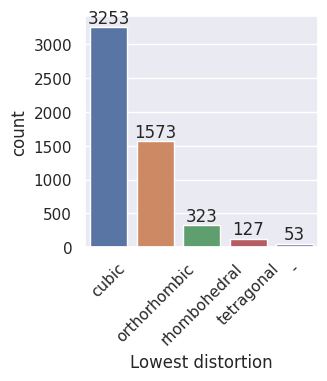

In [8]:
plt.figure(figsize=(3,3))

unbalancedSplot = sns.countplot( x = df['Lowest distortion'] )

plt.bar_label(unbalancedSplot.containers[0])
plt.xticks(rotation=45)
plt.show()

### -. Análisis estadística descriptiva y forma

In [9]:
df.describe()

,Radius A [ang],Radius B [ang]
count,5329.000000,5329.000000
mean,0.974656,0.817846
std,0.337139,0.247479
min,0.270000,0.270000
25%,0.690000,0.630000
50%,0.930000,0.770000
75%,1.180000,0.950000
max,1.880000,1.670000


- Histograma

Text(0.5, 1.0, 'Radius')

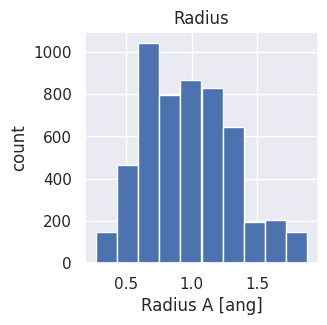

In [10]:
plt.figure(figsize=(3,3))
plt.hist(df["Radius A [ang]"])
plt.xlabel("Radius A [ang]")
plt.ylabel("count")
plt.title("Radius")

Text(0.5, 1.0, 'Radius')

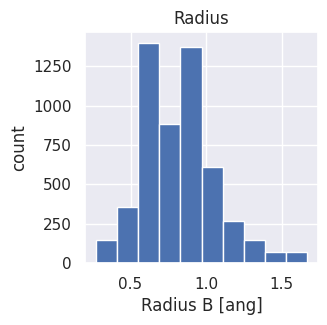

In [11]:
plt.figure(figsize=(3,3))
plt.hist(df["Radius B [ang]"])
plt.xlabel("Radius B [ang]")
plt.ylabel("count")
plt.title("Radius")

In [12]:
df.describe()

,Radius A [ang],Radius B [ang]
count,5329.000000,5329.000000
mean,0.974656,0.817846
std,0.337139,0.247479
min,0.270000,0.270000
25%,0.690000,0.630000
50%,0.930000,0.770000
75%,1.180000,0.950000
max,1.880000,1.670000


- Diagrama de bigote

<function matplotlib.pyplot.show(close=None, block=None)>

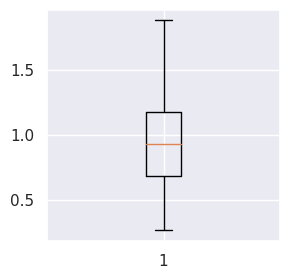

In [13]:
plt.figure(figsize=(3,3))
plt.boxplot(df["Radius A [ang]"], vert=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

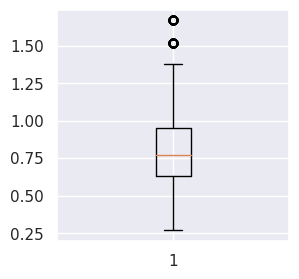

In [14]:
plt.figure(figsize=(3,3))
plt.boxplot(df["Radius B [ang]"], vert=True)
plt.show

### -. Análisis de correlación

> Correlación entre todos los descriptores

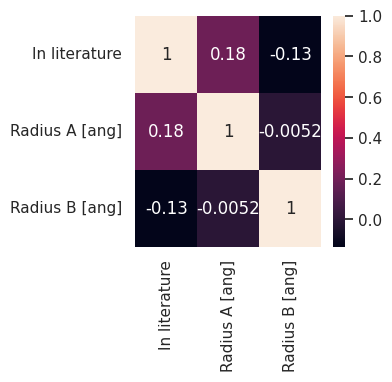

In [15]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr(), annot=True)
plt.show()

> Correlación con target 

### -. Diagramas de dispersión

## Análisis de Q.D

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Chemical formula            5329 non-null   object 
 1   A                           5329 non-null   object 
 2   B                           5329 non-null   object 
 3   In literature               5329 non-null   bool   
 4   Valence A                   5329 non-null   object 
 5   Valence B                   5329 non-null   object 
 6   Radius A [ang]              5329 non-null   float64
 7   Radius B [ang]              5329 non-null   float64
 8   Lowest distortion           5329 non-null   object 
 9   Formation energy [eV/atom]  5329 non-null   object 
 10  Stability [eV/atom]         5329 non-null   object 
 11  Magnetic moment [mu_B]      5329 non-null   object 
 12  Volume per atom [A^3/atom]  5329 non-null   object 
 13  Band gap [eV]               5329 

> Nulos

Se encontró que aunque a primera vista no hayan nulos, el dataset fue contruido de tal forma que en elementos desconocidos se ponían '-' como elemento diferenciador. Es decir, hay nulos aunque se dificulta su identificación

> Cardinalidad

- Revisión cardinalidad de las distintas variables categóricas

In [17]:
print('Cateogrías distitnas para elemento A: \t', len(np.unique(df['A'])))
print('Cateogrías distitnas para elemento B: \t', len(np.unique(df['B'])))

print('Cateogrías distitnas para saber si el compuesto está o no en literatura: \t', len(np.unique(df['In literature'])))

print('Cateogrías distitnas la valencia en A: \t', len(np.unique(df['Valence A'])))
print('Cateogrías distitnas la valencia en B: \t', len(np.unique(df['Valence B'])))

print('Cateogrías distitnas el tipo de estructura crsitalina: \t', len(np.unique(df['Lowest distortion'])))

Cateogrías distitnas para elemento A: 	 73
Cateogrías distitnas para elemento B: 	 73
Cateogrías distitnas para saber si el compuesto está o no en literatura: 	 2
Cateogrías distitnas la valencia en A: 	 7
Cateogrías distitnas la valencia en B: 	 7
Cateogrías distitnas el tipo de estructura crsitalina: 	 5


> Multicolinealidad

No se pudo revisar a profundidad con el dataset en estas condiciones, debido a la incongruencia en los datos

> Leakage

Puesto que se el objetivo de negocio es predecir la microestructura de los compuestos formados, no se dispondrá de ningún parámetro microscópico durante la predicción.

Es decir, para predecir el tipo de escrutura cristalina formada por un compuesto, no tendré su parámetros de red. En caso contrario, es decir, si se desea predecir los parámetros de red, no contaré con la estructura cristalina del compuesto

> Coherencia/congruencia/conformidad de los datos

Se observó que los datos carecen de conformidad, pues en gran medida los distitnos descriptores son incongruentes con su tipo de dato correspondiente. Es decir, variables continuas como los parámetros de red, energáis de formación, momento magnético, etc. tienen asignado un tipo erróneo de datos (objeto)

> En síntesis

La incongruencia de los tipos de datos ocasiona que, a priori, el dataset requiera un fuerte preprocesado

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebb3ed-5c94-423a-a3b7-e9cd0209ff98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>